#### 앙상블(Ensemble) 기법

##### Voting 방식
Hard Voting
 - Logistic
 - SVM
 - KNN

In [1]:
# 데이터 준비
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()
cancer_scaled = MinMaxScaler().fit_transform(cancer.data)
X_train, X_test, y_train, y_test = train_test_split(
    cancer_scaled, cancer.target, stratify=cancer.target,
    test_size=0.2, random_state=2022
)

 - Logistic Regression 

In [2]:
from sklearn.linear_model import LogisticRegression
lrc = LogisticRegression(random_state=2022)

 - SVM

In [3]:
from sklearn.svm import SVC
svc = SVC(random_state=2022)

 - KNN

In [4]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [5]:
# 하드 보팅
from sklearn.ensemble import VotingClassifier
voc = VotingClassifier(
    estimators=[('LRC',lrc),('SVC',svc),('KNN',knn)], voting='hard'
)

In [6]:
# 하드 보팅 분류기
voc.fit(X_train, y_train)
voc.score(X_test, y_test)

1.0

In [8]:
# 개별 분류기
lrc.fit(X_train, y_train)
svc.fit(X_train, y_train)
knn.fit(X_train, y_train)

lrc.score(X_test,y_test), svc.score(X_test,y_test), knn.score(X_test,y_test) 

(0.9912280701754386, 1.0, 0.9824561403508771)

Soft Voting
 - Logistic
 - SVM
 - KNN

In [9]:
# 객체 속성과 메소드
dir(lrc)

['C',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_check_feature_names',
 '_check_n_features',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_predict_proba_lr',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_validate_data',
 'class_weight',
 'classes_',
 'coef_',
 'decision_function',
 'densify',
 'dual',
 'fit',
 'fit_intercept',
 'get_params',
 'intercept_',
 'intercept_scaling',
 'l1_ratio',
 'max_iter',
 'multi_class',
 'n_features_in_',
 'n_iter_',
 'n_jobs',
 'penalty',
 'predict',
 'predict_log_proba',
 'predict_proba',
 'random_state',
 'score',
 'set_params',
 'solver',
 'sparsify'

In [10]:
lrc.predict(X_test[:5])

array([0, 1, 0, 1, 0])

In [11]:
lrc.predict_proba(X_test[:5])

array([[0.99792166, 0.00207834],
       [0.07775117, 0.92224883],
       [0.9774613 , 0.0225387 ],
       [0.05952966, 0.94047034],
       [0.99554778, 0.00445222]])

In [12]:
lrc.predict_log_proba(X_test[:5])

array([[-2.08049988e-03, -6.17618715e+00],
       [-2.55424165e+00, -8.09402136e-02],
       [-2.27965741e-02, -3.79252164e+00],
       [-2.82128065e+00, -6.13751644e-02],
       [-4.46216079e-03, -5.41435240e+00]])

In [16]:
# SVC는 기본적으로 predict_proba 불가 따라서 probability: True로 설정
svc2 = SVC(probability=True, random_state=2022)
svc2.fit(X_train,y_train)
svc2.predict_proba(X_test[:5])

array([[9.99896299e-01, 1.03701492e-04],
       [3.84470713e-03, 9.96155293e-01],
       [9.99896384e-01, 1.03616009e-04],
       [5.97356113e-03, 9.94026439e-01],
       [9.99311796e-01, 6.88204061e-04]])

In [17]:
knn.predict_proba(X_test[:5])

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.]])

In [18]:
voc2 = VotingClassifier(
    estimators=[('LRC',lrc),('SVC',svc2),('KNN',knn)], voting='soft'
)

In [19]:
voc2.fit(X_train,y_train)
voc2.score(X_test,y_test)

1.0

In [20]:
voc2.predict_proba(X_test[:5])

array([[9.99272654e-01, 7.27346212e-04],
       [2.71986265e-02, 9.72801374e-01],
       [9.92452563e-01, 7.54743719e-03],
       [2.18344062e-02, 9.78165594e-01],
       [9.98286525e-01, 1.71347474e-03]])

 - GridSearchCV

In [21]:
params = {
    'LRC__C': [0.1, 1, 10],
    'SVC__C': [0.1, 1, 10]
}

In [22]:
from sklearn.model_selection import GridSearchCV
grid_voc2 = GridSearchCV(voc2, params, scoring='accuracy', cv=5)
grid_voc2.fit(X_train,y_train)
grid_voc2.best_params_

{'LRC__C': 10, 'SVC__C': 0.1}

In [23]:
params = {
    'LRC__C': [8, 10, 12],
    'SVC__C': [0.05, 0.1, 0.15]
}

In [24]:
grid_voc2 = GridSearchCV(voc2, params, scoring='accuracy', cv=5)
grid_voc2.fit(X_train,y_train)
grid_voc2.best_params_

{'LRC__C': 8, 'SVC__C': 0.1}

##### Bagging 방식
Bagging
 - Random Forest

In [26]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=2022)
rfc.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 2022,
 'verbose': 0,
 'warm_start': False}

In [27]:
rfc.fit(X_train,y_train)
rfc.score(X_test,y_test)

1.0

##### 부스팅(Boosting) 방식
Boosting
 - XGBoost
 - LightGBM

In [29]:
from sklearn.datasets import load_wine
wine = load_wine()

In [30]:
import pandas as pd
df = pd.DataFrame(wine.data, columns=wine.feature_names)
print(df.shape)
df.head()

(178, 13)


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [31]:
import numpy as np
np.unique(wine.target, return_counts=True)

(array([0, 1, 2]), array([59, 71, 48], dtype=int64))

In [32]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    wine.data, wine.target, stratify=wine.target, test_size=0.2, random_state=2022
)

In [34]:
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state=2022)
xgb.get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': False,
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'gamma': None,
 'gpu_id': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': None,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': 2022,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [35]:
xgb.fit(X_train,y_train)
xgb.score(X_test,y_test)

0.9722222222222222

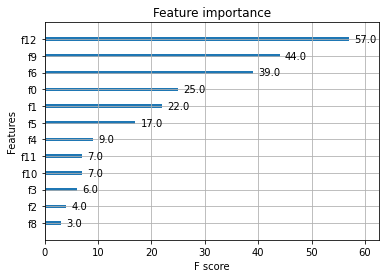

In [51]:
from xgboost import plot_importance as xgb_plot_importance
import matplotlib.pyplot as plt
xgb_plot_importance(xgb)
plt.show()

In [39]:
from sklearn.model_selection import GridSearchCV
params = {'max_depth':[3,4,5,6]}
grid_xgb = GridSearchCV(xgb, params, scoring='accuracy', cv=5)
grid_xgb.fit(X_train,y_train)
grid_xgb.best_params_

{'max_depth': 3}

In [41]:
grid_xgb.best_estimator_.score(X_test,y_test)

1.0

In [43]:
from lightgbm import LGBMClassifier
lgb = LGBMClassifier()
lgb.get_params()

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'num_leaves': 31,
 'objective': None,
 'random_state': None,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'silent': 'warn',
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}

In [44]:
evals = [(X_test, y_test)]
lgb.fit(X_train, y_train, eval_set=evals, eval_metric='logloss', verbose=True)

d:\edu\venv\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's multi_logloss: 0.958896
[2]	valid_0's multi_logloss: 0.85598
[3]	valid_0's multi_logloss: 0.759126
[4]	valid_0's multi_logloss: 0.681757
[5]	valid_0's multi_logloss: 0.611392
[6]	valid_0's multi_logloss: 0.546183
[7]	valid_0's multi_logloss: 0.499552
[8]	valid_0's multi_logloss: 0.452633
[9]	valid_0's multi_logloss: 0.414823
[10]	valid_0's multi_logloss: 0.377414
[11]	valid_0's multi_logloss: 0.345953
[12]	valid_0's multi_logloss: 0.313267
[13]	valid_0's multi_logloss: 0.288691
[14]	valid_0's multi_logloss: 0.268689
[15]	valid_0's multi_logloss: 0.248957
[16]	valid_0's multi_logloss: 0.230522
[17]	valid_0's multi_logloss: 0.20812
[18]	valid_0's multi_logloss: 0.192483
[19]	valid_0's multi_logloss: 0.181496
[20]	valid_0's multi_logloss: 0.170151
[21]	valid_0's multi_logloss: 0.158769
[22]	valid_0's multi_logloss: 0.149514
[23]	valid_0's multi_logloss: 0.138882
[24]	valid_0's multi_logloss: 0.132525
[25]	valid_0's multi_logloss: 0.123253
[26]	valid_0's multi_logloss: 0.1173

LGBMClassifier()

In [45]:
from sklearn.metrics import accuracy_score
pred_lgb = lgb.predict(X_test)
accuracy_score(y_test, pred_lgb)

1.0

In [46]:
from lightgbm import plot_tree, plot_importance, plot_metric

<AxesSubplot:title={'center':'Metric during training'}, xlabel='Iterations', ylabel='multi_logloss'>

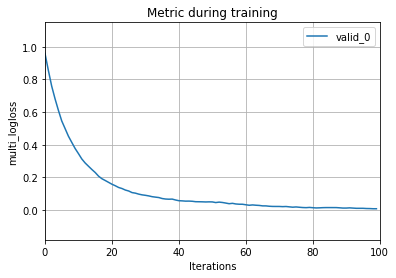

In [47]:
plot_metric(lgb)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

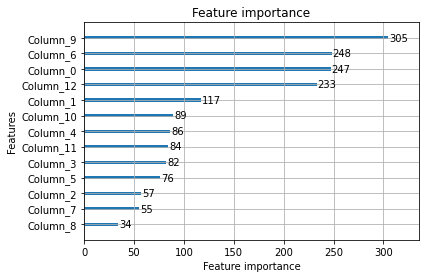

In [48]:
plot_importance(lgb)

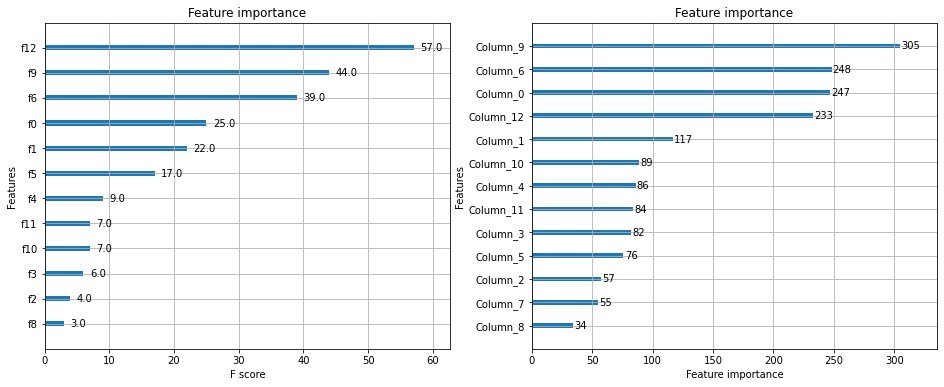

In [61]:
fig, ax = plt.subplots(1,2, figsize=(16,6))
xgb_plot_importance(xgb, ax=ax[0])
plot_importance(lgb, ax=ax[1])
plt.show()

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

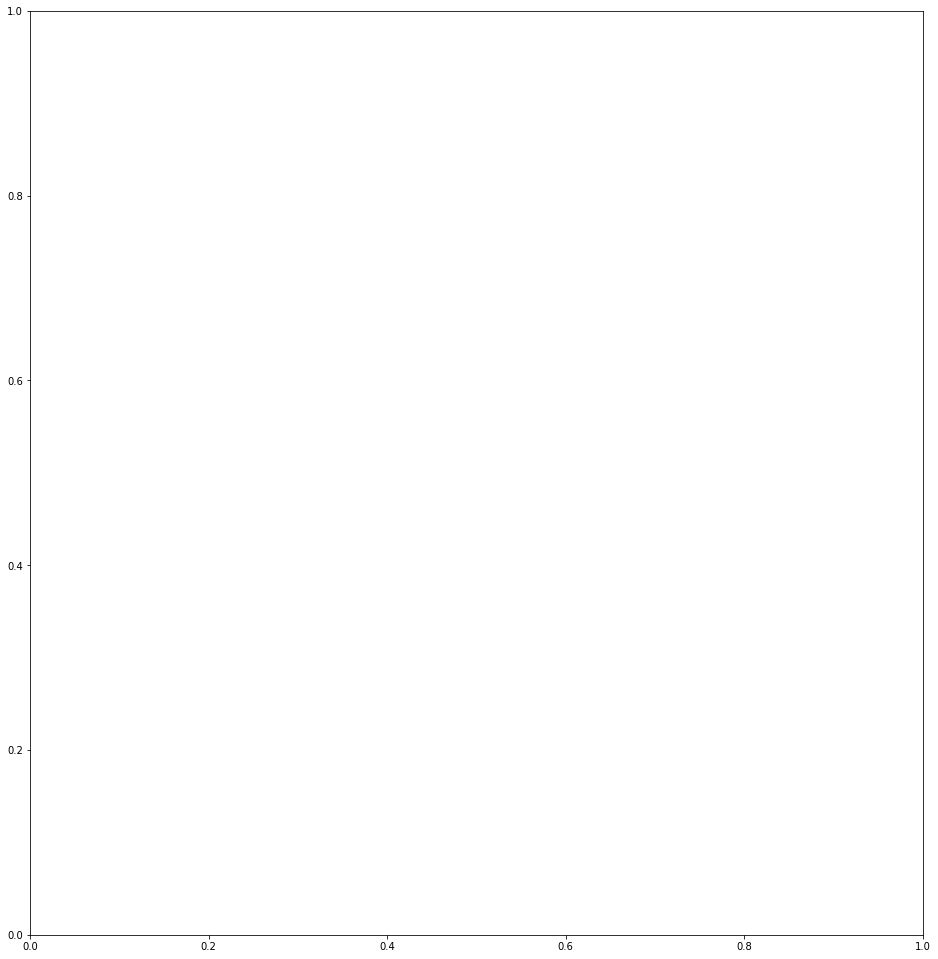

In [63]:
plot_tree(lgb, figsize=(16,17))